In [3]:
## pipeline

from tensorflow.keras.datasets import cifar100

(X_train, y_train), (X_test, y_test) = cifar100.load_data()

print(X_train.shape, X_test.shape)  # Output: (50000, 32, 32, 3) (10000, 32, 32, 3)

2025-05-20 15:14:13.358228: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-20 15:14:13.387239: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-20 15:14:13.834843: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-20 15:14:14.075337: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747754054.332972   20941 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747754054.40

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
(50000, 32, 32, 3) (10000, 32, 32, 3)


2025-05-20 21:58:08.105592: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-20 21:58:08.124109: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-20 21:58:11.368653: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-20 21:58:12.819609: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747778296.710153    1522 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747778297.11

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


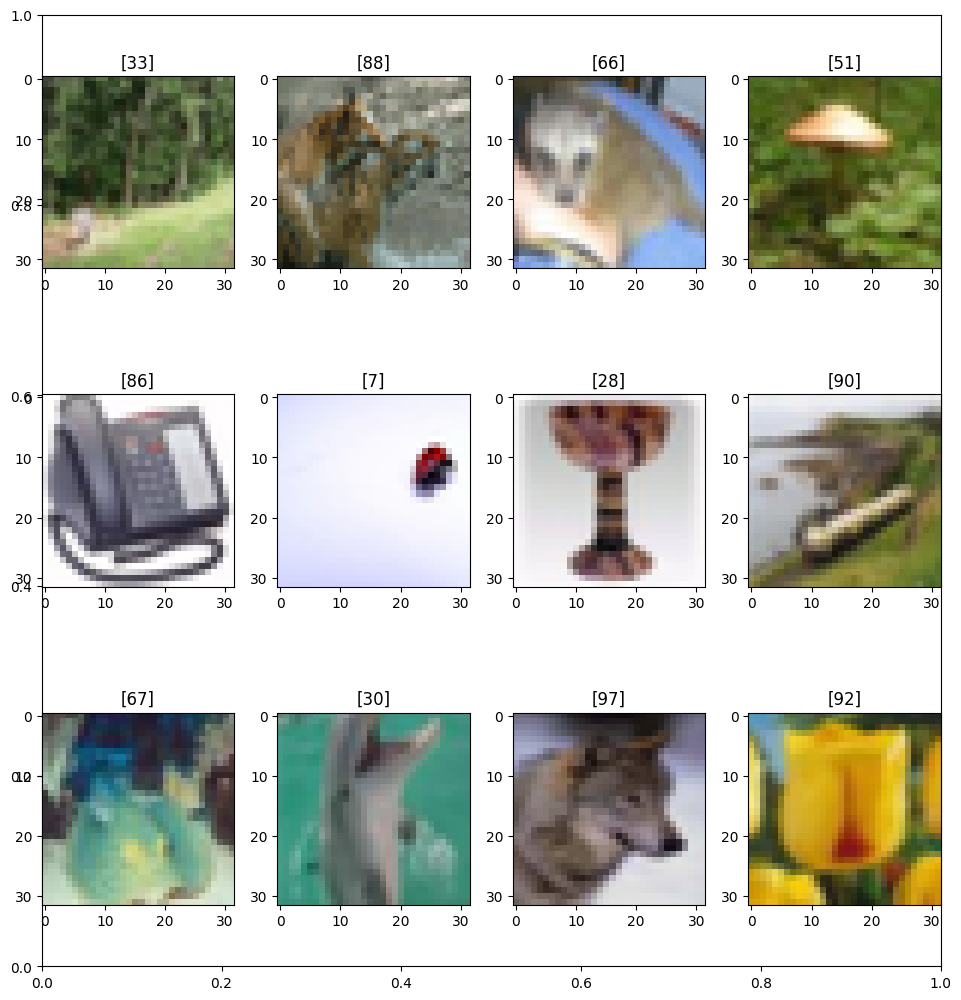

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import layers
# https://www.geeksforgeeks.org/image-classification-using-cifar-10-and-cifar-100-dataset-in-tensorflow/
# alternate way to load up data

cifar100 = tf.keras.datasets.cifar100
(x_train, y_train), (x_val, y_val) = cifar100.load_data()
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)


def show_samples(data, labels):
    plt.subplots(figsize=(10, 10))
    for i in range(12):
        plt.subplot(3, 4, i+1)
        k = np.random.randint(0, data.shape[0])
        plt.title(labels[k])
        plt.imshow(data[k])
    plt.tight_layout()
    plt.show()


show_samples(x_train, y_train)




(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


/tmp/ipykernel_3610/4114886125.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(int(labels[k]))


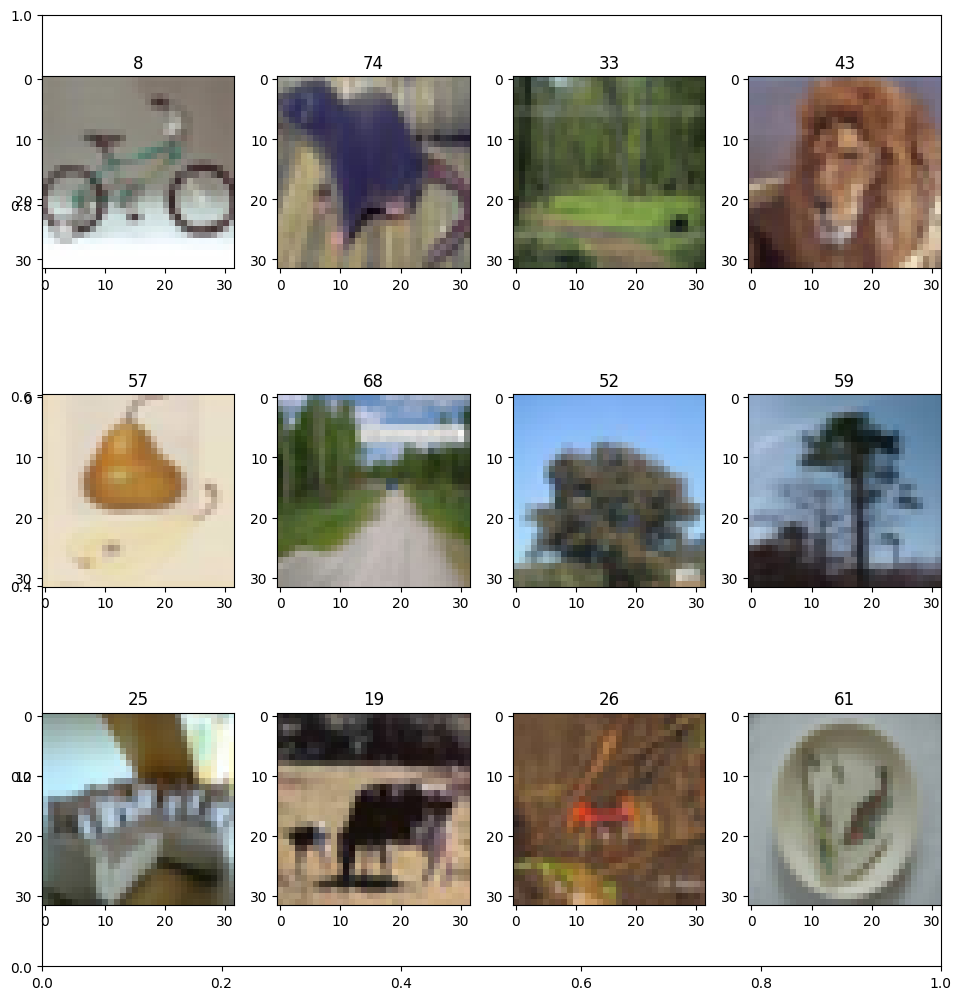

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 102,116 (398.89 KB)

 Trainable params: 102,116 (398.89 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.0266 - loss: 4.4447 - val_accuracy: 0.1200 - val_loss: 3.7484
Epoch 2/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.1038 - loss: 3.8351 - val_accuracy: 0.1740 - val_loss: 3.4389
Epoch 3/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.1506 - loss: 3.5572 - val_accuracy: 0.2300 - val_loss: 3.2034
Epoch 4/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.1848 - loss: 3.3661 - val_accuracy: 0.2506 - val_loss: 3.0502
Epoch 5/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.2086 - loss: 3.2199 - val_accuracy: 0.2624 - val_loss: 2.9953
Epoch 6/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.2298 - loss: 3.1227 - val_accuracy: 0.2828 - val_loss: 2.8885
Epoch 7/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.2468 - loss: 3.0462 - val_accuracy: 0.2988 - val_loss: 2.7978
Epoch 8/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.2536 - loss: 2.9710 - 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import tensorflow as tf
from tensorflow import keras
from keras import datasets, layers, models
from tensorflow.keras.datasets import cifar100
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import MaxPooling2D, Conv2D, Flatten, Dense, Dropout, Activation
from sklearn.model_selection import train_test_split

#load data
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

#checking data and array shape 

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

##Splitting training data into training and validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

## https://www.geeksforgeeks.org/image-classification-using-cifar-10-and-cifar-100-dataset-in-tensorflow/
def show_samples(data, labels):
    plt.subplots(figsize=(10, 10))
    for i in range(12):
        plt.subplot(3, 4, i+1)
        k = np.random.randint(0, data.shape[0])
        plt.title(int(labels[k]))
        plt.imshow(data[k])
    plt.tight_layout()
    plt.show()

show_samples(x_train, y_train)
#plt.figure(figsize=(10, 10))
#for i in range (20):
#rand_num = np.random.randint(0, 5000)
#cifar_img = plt.subploat(5,5, i+1)
#plt.imshow(x_train[rand_num])

#Processing data 
#Converting pixels to float type
## https://github.com/LeoTungAnh/CNN-CIFAR-100/blob/main/CNN_models.ipynb
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# One hot encoding to target classes 

classes = 100
ytrain_categories = to_categorical(y_train, num_classes=100)
yval_categories = to_categorical(y_val, num_classes=100)
ytest_categories = to_categorical(y_test, num_classes=100)

#Building CNN model 
#Uses layers as a 'filtering' system that making model learn based on patterns from taining
## https://github.com/uzairlol/CIFAR100-Image-Classification-CNN/blob/main/Item%20Image%20Model%20Training%20and%20Evaluation.ipynb
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(100, activation='softmax')
])

model.summary()


#Beginning the training of model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#main training section
history = model.fit(x_train, ytrain_categories, epochs=25, batch_size=64, validation_data=(x_val, yval_categories))

test_loss, test_accuracy = model.evaluate(x_test, ytest_categories)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

#Note: IF ERROR OCCURS TRY:
# REFRESHING KERNEL 
# UPDATING LIBRARIES AND MODULES (LIKE NUMPY AND TENSORFLOW)


In [ ]:
#chatgpt correction response
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# 1. Load data
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# 2. Print shapes
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# 3. Split into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

# 4. Show some sample images
def show_samples(data, labels):
    plt.subplots(figsize=(10, 10))
    for i in range(12):
        plt.subplot(3, 4, i+1)
        k = np.random.randint(0, data.shape[0])
        plt.title(int(labels[k]))
        plt.imshow(data[k])
    plt.tight_layout()
    plt.show()

show_samples(x_train, y_train)

# 5. Normalize images
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# 6. One-hot encode labels for categorical_crossentropy
num_classes = 100
y_train_cat = to_categorical(y_train, num_classes)
y_val_cat = to_categorical(y_val, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# 7. Build model
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(num_classes, activation='softmax')
])

model.summary()

# 8. Compile with categorical_crossentropy (because we use one-hot labels)
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 9. Train
history = model.fit(
    x_train, y_train_cat,
    epochs=25,
    batch_size=64,
    validation_data=(x_val, y_val_cat)
)

# 10. Evaluate
test_loss, test_accuracy = model.evaluate(x_test, y_test_cat)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")


ModuleNotFoundError: No module named 'numpy.core.multiarray'

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


/tmp/ipykernel_3610/2828330988.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(int(labels[k]))


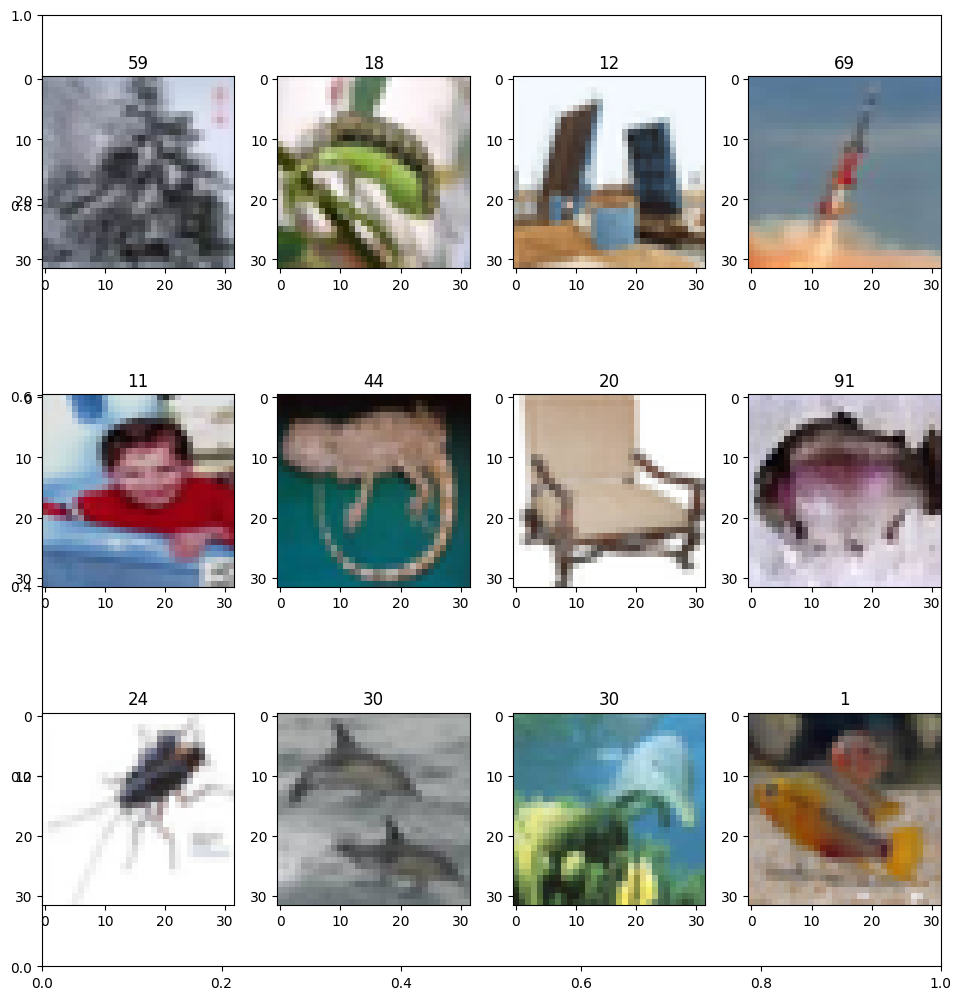

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 102,116 (398.89 KB)

 Trainable params: 102,116 (398.89 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
743/743 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.0274 - loss: 4.4531 - val_accuracy: 0.1148 - val_loss: 3.8459
Epoch 2/25
743/743 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.1036 - loss: 3.8630 - val_accuracy: 0.1728 - val_loss: 3.4636
Epoch 3/25
743/743 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.1539 - loss: 3.5543 - val_accuracy: 0.2228 - val_loss: 3.2495
Epoch 4/25
743/743 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.1867 - loss: 3.3769 - val_accuracy: 0.2412 - val_loss: 3.1320
Epoch 5/25
743/743 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.2030 - loss: 3.2557 - val_accuracy: 0.2660 - val_loss: 3.0128
Epoch 6/25
743/743 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.2308 - loss: 3.1306 - val_accuracy: 0.2752 - val_loss: 2.9403
Epoch 7/25
743/743 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.2441 - loss: 3.0541 - val_accuracy: 0.2980 - val_loss: 2.8879
Epoch 8/25
743/743 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.2543 - loss: 2.9816 - 

In [7]:
#IMPROVED ACCURACY MODEL

import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import tensorflow as tf
from tensorflow import keras
from keras import datasets, layers, models
from tensorflow.keras.datasets import cifar100
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import MaxPooling2D, Conv2D, Flatten, Dense, Dropout, Activation
from sklearn.model_selection import train_test_split

#load data
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

#checking data and array shape 

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

##Splitting training data into training and validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.05, random_state=42)

## https://www.geeksforgeeks.org/image-classification-using-cifar-10-and-cifar-100-dataset-in-tensorflow/
def show_samples(data, labels):
    plt.subplots(figsize=(10, 10))
    for i in range(12):
        plt.subplot(3, 4, i+1)
        k = np.random.randint(0, data.shape[0])
        plt.title(int(labels[k]))
        plt.imshow(data[k])
    plt.tight_layout()
    plt.show()

show_samples(x_train, y_train)
#plt.figure(figsize=(10, 10))
#for i in range (20):
#rand_num = np.random.randint(0, 5000)
#cifar_img = plt.subploat(5,5, i+1)
#plt.imshow(x_train[rand_num])

#Processing data 
#Converting pixels to float type
## https://github.com/LeoTungAnh/CNN-CIFAR-100/blob/main/CNN_models.ipynb
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# One hot encoding to target classes 

classes = 100
ytrain_categories = to_categorical(y_train, num_classes=100)
yval_categories = to_categorical(y_val, num_classes=100)
ytest_categories = to_categorical(y_test, num_classes=100)

#Building CNN model 
#Uses layers as a 'filtering' system that making model learn based on patterns from taining
## https://github.com/uzairlol/CIFAR100-Image-Classification-CNN/blob/main/Item%20Image%20Model%20Training%20and%20Evaluation.ipynb
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(100, activation='softmax')
])

model.summary()


#Beginning the training of model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#main training section
history = model.fit(x_train, ytrain_categories, epochs=25, batch_size=64, validation_data=(x_val, yval_categories))

test_loss, test_accuracy = model.evaluate(x_test, ytest_categories)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

#Note: IF ERROR OCCURS TRY:
# REFRESHING KERNEL 
# UPDATING LIBRARIES AND MODULES (LIKE NUMPY AND TENSORFLOW)
